<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Spatial_GNNDroughtPrediction200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")

In [4]:
processed_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,287,287,201505,-17.068,15.271,297.249,291.684,304.108,292.141,0.000248,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1,1125,287,201506,-17.068,15.271,298.479,292.966,307.924,293.551,0.000030,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
2,1963,287,201507,-17.068,15.271,300.038,296.358,304.813,295.583,0.039828,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
3,2801,287,201508,-17.068,15.271,300.277,297.167,304.959,297.178,0.201599,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
4,3639,287,201509,-17.068,15.271,300.453,296.962,304.370,297.498,0.118411,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,79997,387,202304,51.204,11.678,299.834,294.269,306.253,293.895,0.005088,...,1735.93,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807
83576,80835,387,202305,51.204,11.678,301.408,294.354,307.231,295.266,0.019854,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
83577,81673,387,202306,51.204,11.678,302.933,296.843,309.328,292.453,0.000158,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
83578,82511,387,202307,51.204,11.678,304.032,299.200,309.950,290.167,0.000038,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758


In [ ]:
import networkx as nx
from geopy.distance import geodesic

In [ ]:
sort_processed_dataset = processed_dataset.sort_values(by=["Month",'Lat','Lon'])
sort_processed_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,287,287,201505,-17.068,15.271,297.249,291.684,304.108,292.141,0.000248,...,1557.17,1132.950,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
100,353,353,201505,-15.271,11.678,301.373,296.172,308.188,294.640,0.004157,...,5109.26,3022.500,302.342,2.370390e-05,-1.001900,-0.805957,2015-05-01,2015,5,0.410402
200,320,320,201505,-15.271,13.475,302.880,294.784,313.169,289.788,0.000129,...,2604.32,1772.550,304.710,2.731610e-05,-1.289940,-0.961617,2015-05-01,2015,5,0.135713
300,288,288,201505,-15.271,15.271,302.858,292.597,316.721,286.070,0.000050,...,1685.05,1261.290,306.750,9.166800e-06,-1.090310,-1.004440,2015-05-01,2015,5,0.032209
400,255,255,201505,-15.271,17.068,303.477,292.187,318.409,282.347,0.000047,...,1502.45,1089.280,308.430,1.234480e-06,-1.087370,-1.264120,2015-05-01,2015,5,0.037710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83179,83421,459,202308,49.407,8.085,301.267,295.332,308.758,289.434,0.000062,...,1489.86,1084.490,302.024,6.550340e-07,-1.878460,-1.617230,2023-08-01,2023,8,0.091263
83279,83385,423,202308,49.407,9.881,300.419,294.015,306.637,286.041,0.000321,...,1403.91,1038.670,302.655,5.138590e-07,1.622190,1.952580,2023-08-01,2023,8,0.099182
83379,83348,386,202308,49.407,11.678,306.196,300.897,311.153,289.675,0.000099,...,1650.33,1187.100,305.441,1.044440e-06,4.448400,4.509740,2023-08-01,2023,8,0.146285
83479,83386,424,202308,51.204,9.881,300.222,296.370,305.795,291.744,0.000023,...,1162.77,898.003,302.263,7.311530e-08,0.581537,0.897131,2023-08-01,2023,8,0.159424


In [ ]:
ten_month_dataset = sort_processed_dataset[sort_processed_dataset["Month"].isin([202308, 202307, 202306, 202305, 202304])]

In [ ]:
ten_month_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
95,79897,287,202304,-17.068,15.271,296.765,291.440,307.142,289.853,0.000508,...,1881.11,1320.460,303.146,4.255520e-08,-2.312700,-2.053750,2023-04-01,2023,4,0.103913
195,79963,353,202304,-15.271,11.678,302.095,296.218,311.455,292.444,0.000046,...,4943.03,2807.060,304.280,2.678910e-07,-2.006740,-1.841320,2023-04-01,2023,4,0.304030
295,79930,320,202304,-15.271,13.475,303.314,294.034,314.312,286.329,0.000120,...,3004.12,1904.160,307.381,3.829220e-08,-2.085040,-1.926780,2023-04-01,2023,4,0.098427
395,79898,288,202304,-15.271,15.271,303.348,292.661,315.887,282.490,0.000767,...,2019.48,1454.310,307.851,1.130970e-08,-2.158050,-2.012000,2023-04-01,2023,4,0.031887
495,79865,255,202304,-15.271,17.068,302.457,290.877,316.708,280.865,0.000970,...,1726.87,1215.730,307.306,5.249290e-09,-2.098750,-2.012650,2023-04-01,2023,4,0.036777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83179,83421,459,202308,49.407,8.085,301.267,295.332,308.758,289.434,0.000062,...,1489.86,1084.490,302.024,6.550340e-07,-1.878460,-1.617230,2023-08-01,2023,8,0.091263
83279,83385,423,202308,49.407,9.881,300.419,294.015,306.637,286.041,0.000321,...,1403.91,1038.670,302.655,5.138590e-07,1.622190,1.952580,2023-08-01,2023,8,0.099182
83379,83348,386,202308,49.407,11.678,306.196,300.897,311.153,289.675,0.000099,...,1650.33,1187.100,305.441,1.044440e-06,4.448400,4.509740,2023-08-01,2023,8,0.146285
83479,83386,424,202308,51.204,9.881,300.222,296.370,305.795,291.744,0.000023,...,1162.77,898.003,302.263,7.311530e-08,0.581537,0.897131,2023-08-01,2023,8,0.159424


**Spatial Graph**

In [ ]:
Spatial_graph = nx.Graph()

In [ ]:
# Add nodes with features
for index, row in ten_month_dataset.iterrows():
    Spatial_graph.add_node(index, **row[['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [ ]:
from geopy.distance import geodesic
curMonth = 0

for i, row_i in ten_month_dataset.iterrows():

  month=row_i['Month']

  for j, row_j in ten_month_dataset.iterrows():
    if curMonth == month:
            if i != j:
              # Check if nodes share the same month
              if row_i['Month'] == row_j['Month']:
                  # Calculate distance
                  distance = geodesic((row_i['Lat'], row_i['Lon']), (row_j['Lat'], row_j['Lon'])).kilometers
                  # If distance is less than 210 km, add an edge
                  if distance < 210:
                      Spatial_graph.add_edge(i, j)
    else:
        curMonth = month

In [ ]:
def display_a_to_b_nodes(graph, a, b):
    # Extract the first 200 nodes
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with the first 200 nodes
    subgraph = graph.subgraph(nodes_subset)

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
    plt.show()

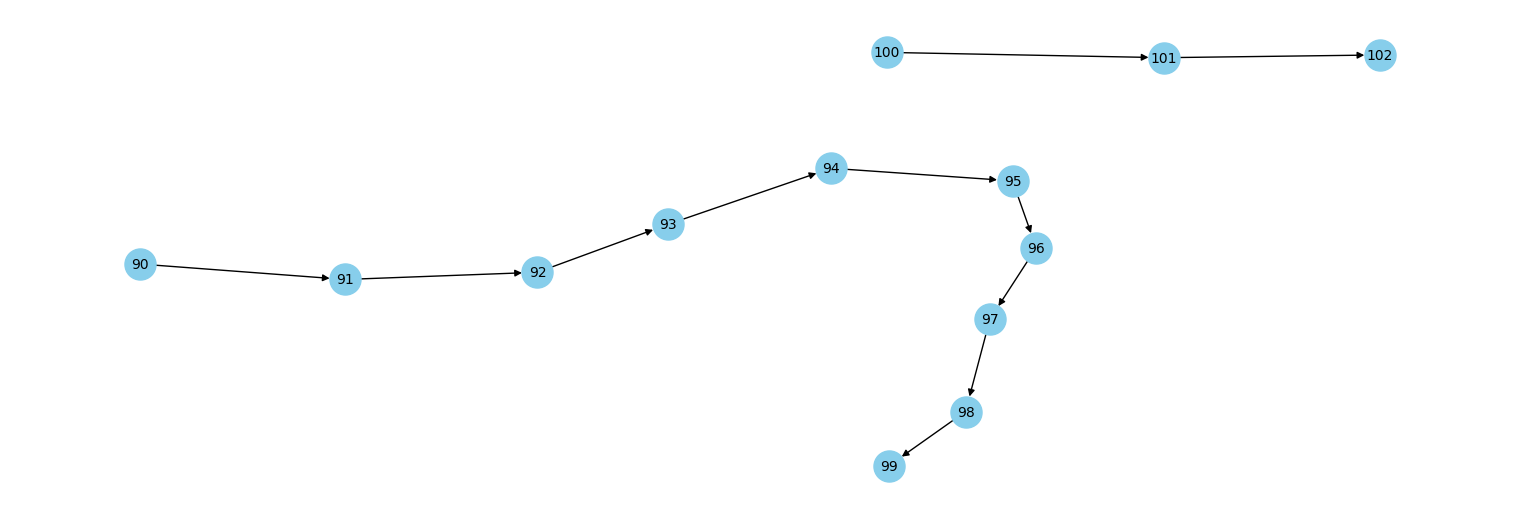

In [ ]:
display_a_to_b_nodes(Temporal_graph, 90, 103)

In [ ]:
#Access node attibutes for the 80th node
Temporal_graph.nodes[list(Temporal_graph.nodes())[80]]

{'Lat': -17.068,
 'Lon': 15.271,
 'temperature_2m': 297.827,
 'temperature_2m_min': 291.844,
 'temperature_2m_max': 306.671,
 'dewpoint_temperature_2m': 285.132,
 'total_precipitation_sum': 0.000353725,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.00018689,
 'u_component_of_wind_10m': -1.58611,
 'v_component_of_wind_10m': -3.68987,
 'surface_net_solar_radiation_sum': 464593000.0,
 'total_evaporation_sum': -0.0178993,
 'soil_moisture_am': 0.138418,
 'soil_moisture_pm': 0.131772,
 'NDVI': 2218.14,
 'EVI': 1488.29,
 'next_month_tempreature': 301.28,
 'next_month_precipitation': 3.39397e-11,
 'year': 2022,
 'month2': 1,
 'spei01': -3.79605}

**Graph Neural Network**

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-9_efswok
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-9_efswok
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 6f5fabe08a870dd06ef9326aba811f5807620325
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4.0-py3-none-any.whl size=1070410 sha256=cc9a7340924a77a6ac04b1cc940bd4d5df628df63b03710dbdc1c10635b49d6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhd47kaw/wheels/